In [384]:
set.seed(228)
iris<-read.csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"), header=FALSE)
irisEtalon<-read.csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"), header=FALSE)
zoo<-read.csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"), header=TRUE)
wine<-read.csv(url("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"), header=TRUE)
ac <- airquality
heart <- read.csv("heart.csv")

In [385]:
names(iris)<-c("Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width", "Species")
names(zoo)<-c('Name','Hair','Geathers','Eggs','Milk','Airborne','Aquatic',
                   'Predator','Toothed','Backbone','Breathes','Venomous','Fins','Legs','Tail','Domestic','Catsize','Type')
names(wine)<-c('Classes','Alcohol','Malic.Acid','Ash','Alcalinity.Of.Ash',
                    'Magnesium','Total.Phenols','Flavanoids','Nonflavanoid.Phenols','Proanthocyanics',
                    'Color.Intensity','Hue','0D280/0D315','Proline')
names(heart)[1] <- "age"

In [391]:
change_col_names <- function(dataSet, colNames){
    #This function 
    names(dataSet) <-colNames
    return(dataSet)
}

shuffle <- function(dataSet){
    #This function randomly shuffles input dataset
    shuffledDS <-dataSet[sample(nrow(dataSet)),]
    return(shuffledDS)
}

replace_helper <- function(col){
    col[is.na(col)] <- median(col, TRUE)
    return(col)
}

replace_na <- function(dataSet, targetAttr){
    #This function gets dataset, and the name of target att., and replaces all na's with median 
    for (class in 1:length(unique(dataSet[targetAttr][[1]])))
    {
        for(num in 1:(length(dataSet)-1)){
           
           dataSet[which(dataSet[targetAttr]==class),][[num]] <-
            replace_helper(dataSet [which(dataSet[targetAttr]==class),][[num]])
        }
    }
   return(dataSet)
}
replace_class <- function(classCol){
    if(is.null(levels(classCol)))
    {
            i=1
        for(num in unique(classCol)){
            classCol[classCol==num]<-i
            i=i+ 1
        }
        return(classCol)
    }
    else{
        levels(classCol) <- seq(length(levels(classCol)))
        return(classCol)
    }
}
train_test_sep <- function(df){
    #Function sepparates dataframe into test and train sets
    #Returns list where 1st is train set, 2nd is test set
    set.seed(111)
    sample_size <- floor(0.7 * nrow(df))
    train_ind <- sample(seq_len(nrow(df)), size = sample_size)
    train_set <- df[train_ind,]
    test_set <-df[-train_ind,]
    head(test_set)
    head(train_set)
    ls<-list(train_set, test_set)
    return(ls)
}
makeplot<-function(){
#     plot(iris$Sepal.Length, iris$Sepal.Width, main="Sepal", pch=21,bg=c('red','green','blue')[unclass(iris$Species)], 
#          xlab='Width',ylab='Length')
#      legend(2,7.9,legend=c('setoza','versicolor','virginica'),col=c('red','green','blue'),
#            lty=1,cex=0.6,title='Species',text.font=6)
#    options(repr.plot.width=5, repr.plot.height=5)
    
   with(iris,plot(Sepal.Length, Sepal.Width, main="Sepal", pch=21,bg=c('red','green','blue')[unclass(Species)],
                  col = Species,xlab='Width',ylab='Length'))
legend("topright",c('setoza','versicolor','virginica'),col=c('red','green','blue'), 
       lty=1,cex=0.6,title='Species',text.font=6)
}




In [83]:
###Why the hell is it happening?????
print(length(unique(iris["Species"])))
print(length(unique(iris$Species)))

[1] 1
[1] 3


# Iris

In [276]:
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


## Change class names

In [277]:
iris$Species<-replace_class(iris$Species)
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,1
4.9,3.0,1.4,0.2,1
4.7,3.2,1.3,0.2,1
4.6,3.1,1.5,0.2,1
5.0,3.6,1.4,0.2,1
5.4,3.9,1.7,0.4,1


## Shuffle df and separate to test and train sets

In [278]:
iris<-shuffle(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
61,5.0,2.0,3.5,1.0,2
102,5.8,2.7,5.1,1.9,3
40,5.1,3.4,1.5,0.2,1
62,5.9,3.0,4.2,1.5,2
49,5.3,3.7,1.5,0.2,1
65,5.6,2.9,3.6,1.3,2


In [279]:
iris_train<-train_test_sep(iris)[[1]]
iris_test<-train_test_sep(iris)[[2]]
nrow(iris_train)
nrow(iris_test)

[1] 105

[1] 45

## Draw scatter plot and histogram

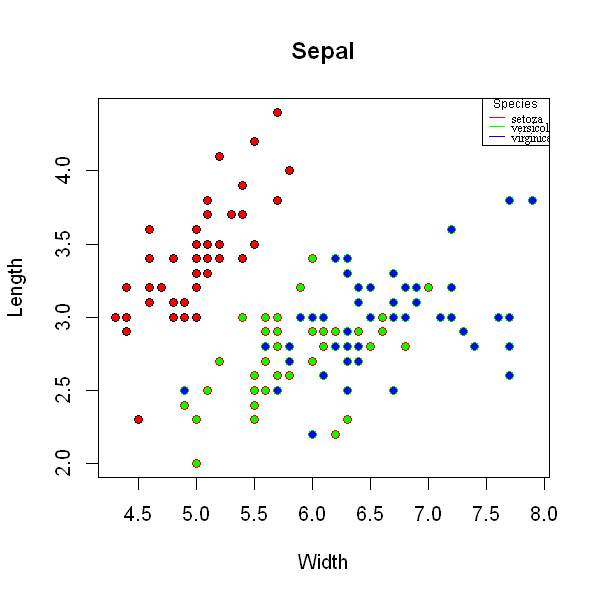

In [392]:
makeplot()

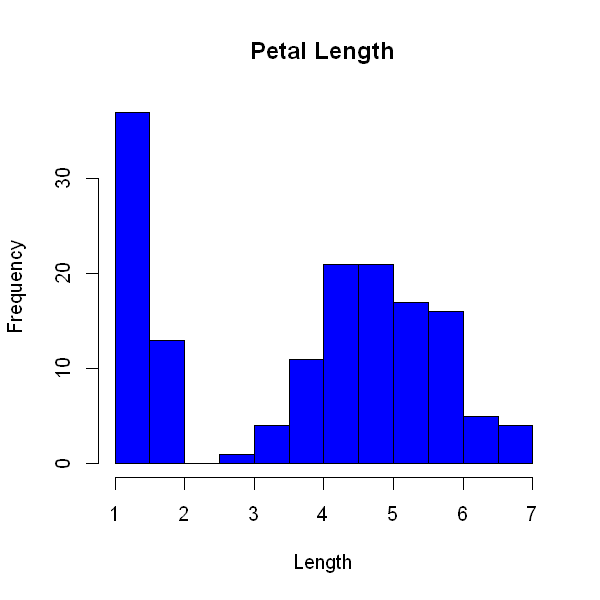

In [322]:
hist(iris$Petal.Length, xlab='Length', col='blue',main='Petal Length')


# Wine

In [282]:
head(wine)

Classes,Alcohol,Malic.Acid,Ash,Alcalinity.Of.Ash,Magnesium,Total.Phenols,Flavanoids,Nonflavanoid.Phenols,Proanthocyanics,Color.Intensity,Hue,0D280/0D315,Proline
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


In [283]:
wine<-shuffle(wine)
head(wine)

,Classes,Alcohol,Malic.Acid,Ash,Alcalinity.Of.Ash,Magnesium,Total.Phenols,Flavanoids,Nonflavanoid.Phenols,Proanthocyanics,Color.Intensity,Hue,0D280/0D315,Proline
140,3,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
36,1,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
12,1,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
86,2,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
163,3,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675


In [284]:
wine_train<-train_test_sep(wine)[[1]]
wine_test<-train_test_sep(wine)[[2]]
nrow(wine_train)
nrow(wine_test)

[1] 123

[1] 54

# Zoo

In [285]:
head(zoo)

Name,Hair,Geathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1


In [286]:
zoo<-shuffle(zoo)
head(zoo)

,Name,Hair,Geathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
90,tortoise,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3
44,leopard,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
35,hamster,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1
74,seal,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0,1,1
65,pony,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1


In [287]:
zoo_train<-train_test_sep(zoo)[[1]]
zoo_test<-train_test_sep(zoo)[[2]]
nrow(zoo_train)
nrow(zoo_test)

[1] 70

[1] 30

#  Heart

In [265]:
head(heart)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [313]:
heart$ca[heart$ca == 4] <- NA


In [317]:
heart<-replace_na(heart,"target")

In [303]:
heart<-shuffle(heart)
head(heart)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
233,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
114,43,1,0,110,211,0,1,161,0,0.0,2,0,3,1
103,63,0,1,140,195,0,1,179,0,0.0,2,2,2,1
269,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0
268,49,1,2,118,149,0,0,126,0,0.8,2,3,2,0
204,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0


In [304]:
heart_train<-train_test_sep(heart)[[1]]
heart_test<-train_test_sep(heart)[[2]]
nrow(heart_train)
nrow(heart_test)

[1] 212

[1] 91

# Airquality

In [305]:
head(ac)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,1,1
36,118,8.0,72,1,2
12,149,12.6,74,1,3
18,313,11.5,62,1,4
18,194,14.3,56,1,5
28,194,14.9,66,1,6


In [291]:
ac$Month<-replace_class(ac$Month)

In [296]:
ac<-replace_na(ac,"Month")

In [295]:
head(ac)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,1,1
36,118,8.0,72,1,2
12,149,12.6,74,1,3
18,313,11.5,62,1,4
NA,NA,14.3,56,1,5
28,NA,14.9,66,1,6


In [297]:
head(ac)

Ozone,Solar.R,Wind,Temp,Month,Day
41,190,7.4,67,1,1
36,118,8.0,72,1,2
12,149,12.6,74,1,3
18,313,11.5,62,1,4
18,194,14.3,56,1,5
28,194,14.9,66,1,6


In [306]:
ac<-shuffle(ac)
head(ac)

,Ozone,Solar.R,Wind,Temp,Month,Day
113,21,259,15.5,77,4,21
76,7,48,14.3,80,3,15
130,20,252,10.9,80,5,7
18,6,78,18.4,57,1,18
34,23,242,16.1,67,2,3
8,19,99,13.8,59,1,8


In [307]:
ac_train<-train_test_sep(ac)[[1]]
ac_test<-train_test_sep(ac)[[2]]
nrow(ac_train)
nrow(ac_test)

[1] 107

[1] 46